# Back-Propagation Algorithm
- Como o próprio nome já nos diz, o algoritmo de proparação ocorre de trás para frente, assim como os cálculos de erro e do delta.
- Durante o capítulo, é abordado a forma como é calculado o erro e o delta.
- A forma como se é calculado o erro pode ser dada pela equação da matriz de peso transposta e vetor delta, isso é feito para cada camada oculta.

## Process to train the neural network using the backpropagation algorithm
- Inicializar os pesos com os valores adequados.
- Inserir as entradas e saídas de dados
- É efetuado o cálcuolo do erro da saída para a correta e calculado o delta
- Propagar o delta da saída para os próximos nós até a última camada (entrada)
- Ajustar os pesos
- Efetuar todo processo até que a rede esteja treinada

# Example: Back-Propagation
- Iremos utilizar os mesmos dados do capítulo 2 que falhou com a rede de 1 neurônio
- Utilizaremos como função de ativação a sigmoid

## XOR Problem
- Para resolver esse problema utilizaremos o mesmo método de treinamento SGD do capítulo anterior

In [14]:
import numpy as np 

def TestBackpropXOR():
    
    # Matrizes de testes
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    
    # Matrize de resultados
    D = np.array([[0],
                  [1],
                  [1],
                  [0]])
    
    # Inicializa um valor aleatório para os pesos
    W1 = 2*np.random.random((4, 3)) - 1 #Matriz 4x3
    W2 = 2*np.random.random((1, 4)) - 1 #matriz 1x4
    
    #Inicia o aprendizado
    for _epoch in range(10000):
        alpha = 0.9
    
        N = 4
        #Percorre os vetores de teste
        for k in range(N):
            x = X[k, :].T #Tanspoem o vetor de testes
            d = D[k] # Coloca o array de resultados em d
            
            #Primeiro neurônio
            v1 = np.matmul(W1, x) #Multiplica W1 (peso) com o array de teste
            y1 = 1.0 / (1.0 + np.exp(-v1)) #Calcula a saída do neurônio (função de ativação)
            
            #Segundo neurônio
            v  = np.matmul(W2, y1) #Multiplica W2 (peso) com o array gerado pelo primeiro neurônio
            y  = 1.0 / (1.0 + np.exp(-v)) #Calcula a saída do neurônio (função de ativação)

            #Calcula o erro da saída do segundo neurônio (último neurônio)
            e = d - y
            
            #Calculado o delta em cima do erro gerado pelo segundo (último) neurônio
            delta = y*(1-y) * e
            
            #Calcula a correção do peso para o segundo neurônio
            W2 += alpha * delta * y1
            
            #Calcula o erro do primeiro neurônio
            e1 = np.matmul(W2.T, delta)
            
            #Calculado o delta do primeiro neurônio em cima do erro gerado pelo segundo neurônio
            delta1 = y1*(1-y1) * e1

            #Calcula a correção do peso para o primeiro neurônio
            W1 += (alpha*delta1).reshape(4, 1) * x
            #(alpha*delta1).reshape(4, 1) array de (alpha*delta1) com 4 linhas e 1 coluna 
            #x.reshape(1, 3)) array de x com 1 linha e 3 colunas 
        
    N = 4
    #Percorre os elementos de teste.
    for k in range(4):
        x  = X[k ,:].T #Tanspoem o vetor de testes   
        v1 = np.matmul(W1, x) #Multiplica a matriz W1 (pesos) com o array de entrada
        y1 = 1.0 / (1.0 + np.exp(-v1)) #Calcula a saída do neurônio pela função sigmoid
        v  = np.matmul(W2, y1) #Multiplica a matriz W (pesos) com o resultado do neurônio anterior
        y  = 1.0 / (1.0 + np.exp(-v)) #Cálcula a saída do neurônio pela função sigmoid
        print(y) #Exibe os resultados

if __name__ == '__main__':
    TestBackpropXOR()

[0.0059612]
[0.98679757]
[0.98883416]
[0.01446703]


# Momentum
- Neste capítulo é tratado algumas fórmulad de cálculo dos pesos de forma a melhorar o desempenho e o aprendizado.
- Melhora na estabilidade do cálculo dos pesos.
- Aumento na taxa de aprendizado

In [7]:
import numpy as np

def TestBackpropMmt():
    
    # Matrizes de testes
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    
    # Matrize de resultados
    D = np.array([[0],
                  [1],
                  [1],
                  [0]])
    
    # Inicializa um valor aleatório para os pesos
    W1 = 2*np.random.random((4, 3)) - 1 #Matriz 4x3
    W2 = 2*np.random.random((1, 4)) - 1 #Matriz 1x4
    
    #Inicia o treinamento
    for _epoch in range(10000):
        alpha = 0.9
        beta  = 0.9

        #Inicializa com zero a matriz de momentum
        mmt1 = np.zeros_like(W1)
        mmt2 = np.zeros_like(W2)

        N = 4
        #Percorre os vetores de teste
        for k in range(N):
            x = X[k, :].T #Tanspoem o vetor de testes
            d = D[k]      #Coloca o array de resultados em d

            #Primeiro neurônio
            v1 = np.matmul(W1, x) #Multiplica W1 (peso) com o array de teste
            y1 = 1.0 / (1.0 + np.exp(-v1)) #Calcula a saída do neurônio (função de ativação sigmoid)
            
            #Segundo neurônio
            v = np.matmul(W2, y1) #Multiplica W2 (peso) com o array gerado pelo primeiro neurônio
            y = 1.0 / (1.0 + np.exp(-v)) #Calcula a saída do neurônio (função de ativação sigmoid)

            #Segundo neurônio
            e = d - y #Calcula o erro
            delta = y*(1-y) * e #Calculado o delta em cima do erro gerado

            #Primeiro neurônio
            e1 = np.matmul(W2.T, delta) #Calcula o erro
            delta1 = y1*(1-y1) * e1 #Calculado o delta em cima do erro

            #Primeiro neurônio
            dW1  = (alpha*delta1).reshape(4, 1) * x #Calcula a correção do peso para o segundo neurônio
            mmt1 = dW1 + beta*mmt1 #Calcula o Momentum com relação a correção
            W1   = W1 + mmt1 #Acumula o pesso corrigido pelo Momentum

            #Segundo neurônio
            dW2  = alpha * delta * y1 #Calcula a correção do peso para o primeiro neurônio
            mmt2 = dW2 + beta*mmt2 #Calcula o Momentum com relação a correção
            W2   = W2 + mmt2 #Acumula o peso corrigido pelo Momentum
        
    N = 4
    #Percorre os elementos de teste.
    for k in range(N):
        x  = X[k, :].T #Tanspoem o vetor de testes
        v1 = np.matmul(W1, x) #Multiplica a matriz W1 (pesos) com o array de entrada
        y1 = 1.0 / (1.0 + np.exp(-v1)) #Calcula a saída do neurônio pela função sigmoid
        v  = np.matmul(W2, y1) #Multiplica a matriz W (pesos) com o resultado do neurônio anterior
        y  = 1.0 / (1.0 + np.exp(-v)) #Cálcula a saída do neurônio pela função sigmoid
        print(y) #Exibe os resultados

if __name__ == '__main__':
    TestBackpropMmt()

[0.00355682]
[0.9932837]
[0.99284131]
[0.01548332]


# Cost Function and Learning Rule
- Associado a teoria de otimizações.
- A função de custo está relacionada ao aprendizado supervisionado da rede neural, onde a função de erro é o custo. Quanto maior o erro da rede neural, maior será o valor da função de custo. 
- A função cross entropy é muito mais sensível que a função quadratica de erro, as regras de aprendizagem são conhecidas por ser melhor em desempenho
- A diferença entre o Back-Propagation é o cálculo do delta, onde agora o delta é igual ao erro.
- Para diminuir o valor da função de custo, tanto o erro quanto o peso devem ser controlados para serem os menores possíveis
- Se um peso se torna pequeno o suficiente, ele é praticamente "desconectado" da rede

# Example: Cross Entropy Function
- Para a regra de Cross Entropy não é calculado o delta em cima da derivada da função de ativação (Sigmoid), porém no algorítmo Back-Propagation, a derivada ainda é utilizada para o cálculo de propagação do delta.

In [11]:
import numpy as np

def TestBackpropCE():
    
    #Matrizes de testes
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    
    #Matrize de resultados
    D = np.array([[0],
                  [0],
                  [1],
                  [1]])
    
    #Inicializa um valor aleatório para os pesos
    W1 = 2*np.random.random((4, 3)) - 1
    W2 = 2*np.random.random((1, 4)) - 1
    
    #Inicia o treinamento
    for _epoch in range(10000):
        alpha = 0.9

        N = 4
        #Percorre os vetores de teste
        for k in range(N):
            x = X[k, :].T #Tanspoem o vetor de testes
            d = D[k]      #Coloca o array de resultados em d

            #Primeiro neurônio
            v1 = np.matmul(W1, x) #Multiplica W1 (peso) com o array de teste
            y1 = 1.0 / (1.0 + np.exp(-v1)) #Calcula a saída do neurônio (função de ativação sigmoid)
            
            #Segundo neurônio
            v  = np.matmul(W2, y1) #Multiplica W2 (peso) com o array gerado pelo segundo neurônio
            y  = 1.0 / (1.0 + np.exp(-v)) #Calcula a saída do neurônio (função de ativação sigmoid)

            #Segundo neurônio
            e = d - y #Calcula o erro
            delta = e #Alteração com relação as anteriores, delta não é mais a derivada da função de ativação.
                      #Isso vem da função de custo baseada na teoria de otimização.

            #Primeiro neurônio
            e1 = np.matmul(W2.T, delta) #Calcula o erro
            delta1 = y1*(1-y1) * e1 #Calculado o delta em cima do erro

            #Primeiro neurônio
            dW1 = (alpha*delta1).reshape(4, 1) * x #Calcula a correção do peso
            W1  = W1 + dW1 #Acumula a correção corrigindo o peso

            #Segundo neurônio
            dW2 = alpha * delta * y1 #Calcula a correção do peso
            W2  = W2 + dW2 #Acumula a correção corrigindo o peso
        
    N = 4
    for k in range(N):
        x  = X[k, :].T #Tanspoem o vetor de testes
        v1 = np.matmul(W1, x) #Multiplica a matriz W1 (pesos) com o array de entrada
        y1 = 1.0 / (1.0 + np.exp(-v1)) #Calcula a saída do neurônio pela função sigmoid
        v  = np.matmul(W2, y1) #Multiplica a matriz W (pesos) com o resultado do neurônio anterior
        y  = 1.0 / (1.0 + np.exp(-v)) #Cálcula a saída do neurônio pela função sigmoid
        print(y) #Exibe os resultados.
        
if __name__ == '__main__':
    TestBackpropCE()

[4.5091538e-05]
[3.04122746e-05]
[0.99995667]
[0.99994958]


# Comparison of Cost Functions

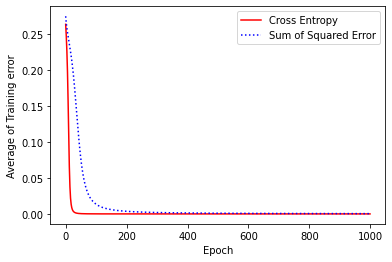

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Função sigmoid 
def Sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def BackpropXOR(W1, W2, X, D):
    alpha = 0.9
    
    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        
        e     = d - y
        delta = y*(1-y) * e
        
        e1     = np.matmul(W2.T, delta)
        delta1 = y1*(1-y1) * e1
        
        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1  = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2  = W2 + dW2
    
    return W1, W2

def BackpropCE(W1, W2, X, D):
    alpha = 0.9

    N = 4
    for k in range(N):
        x = X[k, :].T
        d = D[k]
        
        v1 = np.matmul(W1, x)
        y1 = Sigmoid(v1)
        v  = np.matmul(W2, y1)
        y  = Sigmoid(v)
        
        e     = d - y
        delta = e
        
        e1     = np.matmul(W2.T, delta)
        delta1 = y1*(1-y1) * e1
        
        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1  = W1 + dW1
               
        dW2 = alpha * delta * y1
        W2  = W2 + dW2
    
    return W1, W2

def TestCEvsSSE():
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])

    D = np.array([[0],
                  [0],
                  [1],
                  [1]])

    E1 = np.zeros(1000)
    E2 = np.zeros(1000)

    W11 = 2*np.random.random((4, 3)) - 1
    W12 = 2*np.random.random((1, 4)) - 1
    W21 = np.array(W11)
    W22 = np.array(W12)

    for _epoch in range(1000):
        W11, W12 = BackpropCE(W11, W12, X, D)
        W21, W22 = BackpropXOR(W21, W22, X, D)

        es1 = 0
        es2 = 0 
        N   = 4
        for k in range(N):
            x = X[k, :].T
            d = D[k]

            v1  = np.matmul(W11, x)
            y1  = Sigmoid(v1)
            v   = np.matmul(W12, y1)
            y   = Sigmoid(v)
            es1 = es1 + (d - y)**2

            v1  = np.matmul(W21, x)
            y1  = Sigmoid(v1)
            v   = np.matmul(W22, y1)
            y   = Sigmoid(v)
            es2 = es2 + (d - y)**2

        E1[_epoch] = es1 / N
        E2[_epoch] = es2 / N


    CE,  = plt.plot(E1, 'r')
    SSE, = plt.plot(E2, 'b:')
    plt.xlabel('Epoch')
    plt.ylabel('Average of Training error')
    plt.legend([CE, SSE], ["Cross Entropy", "Sum of Squared Error"])
    plt.show()

if __name__ == '__main__':
    TestCEvsSSE()

- Ambos as funções tiveram a mesma quantidade de treinamento (10000)
- Percebe-se que a função cross entropy tem a redução do erro muito mais rápido que a função de Back-Propagation vista no começo do capítulo. Em outras palavras, vemos que a função cross entropy-driven tem o aprendizado muito mais rápido.